<a href="https://colab.research.google.com/github/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/blob/main/Module_5/Assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5
Zachariah Freitas<br>
2022-10-04


Your task is to construct and evaluate multiple data mining models, including k-means, logistic regression, decision trees, random forest classifiers, and bagging classifiers, to segment customers in order to understand their purchase behavior and influence brand loyalty.

Install Libraries

In [1]:
# Connect Colab to Google Drive for Convience.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install Book Libraries
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.1 MB/s 


In [3]:
# Import Libraries

# EDA and Preprep
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np

from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

# Classification Model Libraries
# from sklearn.linear_model import LogisticRegressionCV # lr or Logistic Regression
# from sklearn.ensemble import BaggingClassifier # bc or Bagging Classifier
# from sklearn.ensemble import AdaBoostClassifier # abc or Ada Boost Classifier
# from sklearn.ensemble import RandomForestClassifier # rf or Random Forest Classifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # lda or Linear Discriminant Analysis
# from sklearn.neural_network import MLPClassifier # nn or Neural Nets
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Book Helper Functions
from dmba import plotDecisionTree, gainsChart, liftChart, classificationSummary, regressionSummary
from dmba.metric import AIC_score
# import dmba

# Plotting Libraries
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Inline Plot Formating
%matplotlib inline

no display found. Using non-interactive Agg backend


In [4]:
# Dataset Source
dataSource = 'https://raw.githubusercontent.com/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/main/Module_5/Assignment_5/BathSoapHousehold.csv'

In [5]:
df = pd.read_csv(dataSource)
df_copy = df.copy()

df_copy.columns = [d.replace(' ', '_').replace('.', '') for d in df_copy.columns]
# df_copy = df_copy.iloc[: , 2:]
# Drop unnecessary columns
# df_copy = df_copy.drop('TARGET_D', axis=1)
df_copy.head()

,Member_id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [9]:
# Demographics that we want to ignore
Demographics = ['SEC', 'FEH' , 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'SHILD', 'CS', 'Affluence_Index']

## Question 1
Use k-means clustering to identify clusters of households based on:


### Question 1.1
The variables that describe purchase behavior (including brand loyalty) (10 points)


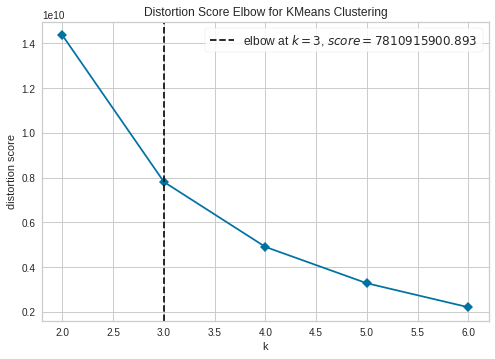

In [48]:
# Purchase behavior (volume, frequency, susceptibility to discounts, and brand loyalty)
Purchase_behavior = ['No_of_Brands', 'Brand_Runs', 'Total_Volume', 'No_of__Trans', 'Value',
                     'Trans_/_Brand_Runs', 'Vol/Tran', 'Avg_Price_', 'Pur_Vol_No_Promo_-_%',
                     'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'Br_Cd_57,_144',
                     'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24', 'Br_Cd_481',
                     'Br_Cd_352', 'Br_Cd_5', 'Others_999'] 

#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,7), timings=False)
 
visualizer.fit(df_copy[Purchase_behavior])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

---
**Answer:**



--- 
<br>

### Question 1.2
The variables that describe the basis for purchase (10 points)

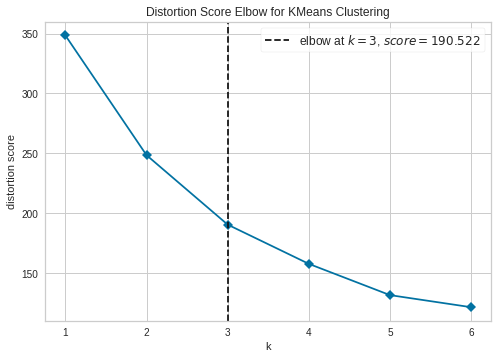

In [49]:
# Basis of purchase (price, selling proposition)
Basis_of_purchase = ['Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 
                       'PropCat_5', 'PropCat_6', 'PropCat_7','PropCat_8',
                       'PropCat_9', 'PropCat_10', 'PropCat_11', 'PropCat_12',
                       'PropCat_13','PropCat_14','PropCat_15']  
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1,7), timings=False)
 
visualizer.fit(df_copy[Basis_of_purchase])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

---
**Answer:**



--- 
<br>

### Question 1.3
The variables that describe both purchase behavior and basis of purchase
(14 points)

**Note 1:** How should k be chosen? Think about how the clusters would be used. It is likely that the marketing efforts would support two to five different promotional approaches.

**Note 2:** How should the percentages of total purchases by various brands be treated? Isn’t a customer who buys all brand A just as loyal as a customer who buys all brand B? What will be the effect on any distance measure of using the brand share variables as is? Consider using a single derived variable.


(600, 35)
(600, 20)
(600, 15)


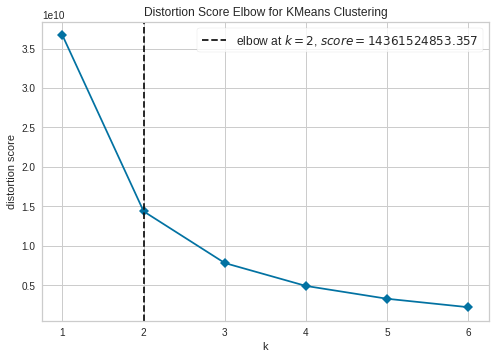

In [58]:
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1,7), timings=False)
 
visualizer.fit(df_copy[Purchase_behavior + Basis_of_purchase])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

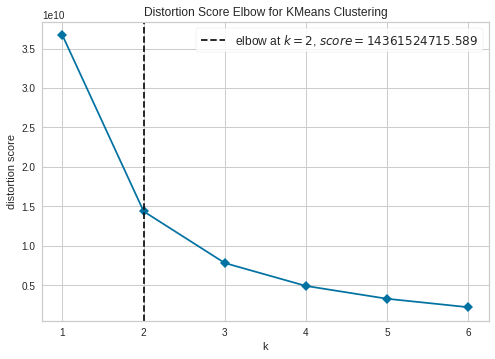

In [74]:
# Create a variable that combines individual loyalty to one brand to overall loyalty to any brand.
df_copy['max_br'] = df_copy[['Br_Cd_57,_144','Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24', 'Br_Cd_481','Br_Cd_352', 'Br_Cd_5', 'Others_999']].max(axis=1)

Purchase_behavior_max = ['No_of_Brands', 'Brand_Runs', 'Total_Volume', 'No_of__Trans', 'Value',
                         'Trans_/_Brand_Runs', 'Vol/Tran', 'Avg_Price_', 'Pur_Vol_No_Promo_-_%',
                         'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'max_br'] 
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1,7), timings=False)


x = df_copy[Purchase_behavior_max + Basis_of_purchase]
 
visualizer.fit(df_copy[Purchase_behavior_max + Basis_of_purchase])         # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

---
**Answer:**



--- 
<br>

## Question 2
Select what you think is the best segmentation and comment on the characteristics (demographic, brand loyalty, and basis for purchase) of these clusters. (This information would be used to guide the development of advertising and promotional campaigns.)(14 points)


---
**Answer:**



--- 
<br>

## Question 3
Develop a model that classifies the data into these segments. Since this information would most likely be used in targeting direct-mail promotions, it would be useful to select a market segment that would be defined as a success in the classification model.(14 points)


---
**Answer:**



--- 
<br>

## Question 4
Briefly explain, in two to three paragraphs, the business objective, the data mining models used, why they were used, the model results, and your recommendations to your non-technical stakeholder team. (18 points)



---
**Answer:**



--- 
<br>